# PROBLEM STATEMENT 

Dataset contains daily weather observations of Australian weather stations, and your goal is to predict whether it will rain tomorrow based on the data. The target variable you want to predict is "RainTomorrow," which is a binary variable with two possible values: "Yes" or "No."

In this context, "RainTomorrow" is set to "Yes" if the amount of rain recorded for the current day is 1mm or more, indicating that it rained that day. If the recorded rainfall is less than 1mm, "RainTomorrow" is set to "No," indicating that it did not rain that day.

- The aim of this is to test the chances of raining in australia Yes or No

# OVERVIEW 

The dataset weatherAUS.csv contains 40000 rows and 23 columns to weather observations in Australia. Here's an explanation of each column:

- Date: The date of the observation.
- Location: The location where the weather data was recorded.
- MinTemp: The minimum temperature in degrees Celsius.
- MaxTemp: The maximum temperature in degrees Celsius.
- Rainfall: The amount of rainfall recorded for the day in millimeters.
- Evaporation: The so-called Class A pan evaporation (in millimeters) in the 24 hours to 9am.
- Sunshine: The number of hours of bright sunshine in the day.
- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight.
- WindGustSpeed: The speed (in km/h) of the strongest wind gust in the 24 hours to midnight.
- WindDir9am: Direction of the wind at 9am.
- WindDir3pm: Direction of the wind at 3pm.
- WindSpeed9am: Wind speed (in km/h) averaged over 10 minutes prior to 9am.
- WindSpeed3pm: Wind speed (in km/h) averaged over 10 minutes prior to 3pm.
- Humidity9am: Humidity (percent) at 9am.
- Humidity3pm: Humidity (percent) at 3pm.
- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am.
- Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm.
- Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas," which are a unit of eighths. It records how many eighths of the sky are obscured by cloud.
- Cloud3pm: Fraction of sky obscured by cloud at 3pm. Similar to Cloud9am.
- Temp9am: Temperature (degrees Celsius) at 9am.
- Temp3pm: Temperature (degrees Celsius) at 3pm.
- RainToday: Indicates if it has rained. Yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise No.
- RainTomorrow: The target variable. Indicates if it will rain tomorrow. Yes or No.

These columns provide comprehensive information about daily weather conditions, useful for various analyses including weather forecasting, climate studies, and understanding local weather patterns. 











There is a date variable. It is denoted by Date column.
There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.
There are two binary categorical variables - RainToday and RainTomorrow.
RainTomorrow is the target variable.


## ------------------------------------------------------------------------------------

## Guidelines to follow in this notebook 
- The name of the main dataframe should be df 
- Keep the seed value 42
- Names of training and testing variables should be X_train, X_test, y_train, y_test
- Keep the name of model instance as "model", e.g. model = DecisionTreeClassifer()
- Keep the predictions on training and testing data in a variable named y_train_pred and y_test_pred respectively.

## ------------------------------------------------------------------------------------

## Import Libraries 
#### Lets begin by importing necessary data libraries 

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import f1_score
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

## Load the dataset

In [2]:
### load the dataset and print no. of rows and columns 
# your code here
df = pd.read_csv("Rain_inaus_feature_engineering_final.csv")

print(df.shape)

(40000, 23)


In [3]:
# Display the first few rows of the dataset 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2017-02-11,MountGambier,15.2,24.3,0.0,4.4,6.8,SW,39.0,SSE,...,70.0,58.0,1010.8,1010.1,8.0,8.0,18.2,20.9,No,Yes
1,2011-08-23,Brisbane,13.9,21.6,8.8,3.2,6.6,ESE,44.0,SW,...,88.0,74.0,1026.9,1024.2,3.0,5.0,17.0,20.0,Yes,Yes
2,2014-09-11,Newcastle,9.5,24.2,0.0,4.4,6.8,W,41.0,NW,...,56.0,33.0,1016.5,1014.2,0.0,0.0,17.0,24.0,No,Yes
3,2015-05-31,CoffsHarbour,16.3,20.7,4.4,4.4,6.8,WSW,41.0,WSW,...,96.0,82.0,1016.9,1012.0,8.0,5.0,16.8,20.0,Yes,Yes
4,2015-04-07,NorahHead,15.2,25.1,3.8,4.4,6.8,W,46.0,NNW,...,79.0,58.0,1007.9,1007.3,6.0,6.0,20.4,20.5,Yes,Yes


In [4]:
# Checking the null values in the dataset
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [5]:
# Storing the  numerical columns in a list which will be used later while training the model
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# FEATURE GENERATION 

- Now we will create new features using the features available to us in the dataset 

## First we will work on the column 'Date'

In [6]:
# change the datatype of Column "Date" from  object to datetime
# your code here
df["Date"] = pd.to_datetime(df["Date"])


- Create three columns using the column 'Date' : day, month and year 

In [7]:
# extract year from date
df['Year'] = df['Date'].dt.year
df['Year'].min()

2007

In [8]:
df['Month'] = df['Date'].dt.month
df['Month'].min()

1

In [9]:
# extract day from date
df['Day'] = df['Date'].dt.day
df['Day'].min()

1

In [10]:
# Drop the column Date as we have already created 3 columns using the column Date
# your code here
df.drop(["Date"], axis=1, inplace=True)

- Here Using the Column 'Date', we created three new features and will have to drop the parent column (DATE) as it may lead to collinearity in data

### We can look at the correlation matrix and see if we can create other features  

In [11]:
# Using the corr function to check the correlation matrix
df[numerical].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.738167,0.088993,0.425236,0.018875,0.118289,0.126378,0.114690,-0.194706,0.024682,-0.342039,-0.350375,0.028620,-0.014037,0.902188,0.698847
MaxTemp,0.738167,1.000000,-0.203555,0.504883,0.310638,0.012157,-0.036053,0.010518,-0.484964,-0.483223,-0.211770,-0.296823,-0.244086,-0.237977,0.882273,0.963638
Rainfall,0.088993,-0.203555,1.000000,-0.144796,-0.239205,0.171846,0.123753,0.081482,0.391318,0.391765,-0.217144,-0.141204,0.245268,0.202764,-0.068312,-0.205536
Evaporation,0.425236,0.504883,-0.144796,1.000000,0.323542,0.122791,0.116889,0.104602,-0.399177,-0.285545,-0.204183,-0.225830,-0.184046,-0.191317,0.495531,0.484873
Sunshine,0.018875,0.310638,-0.239205,0.323542,1.000000,-0.047324,-0.017596,0.035724,-0.359475,-0.471784,0.075752,0.035053,-0.537514,-0.558105,0.176163,0.331925
WindGustSpeed,0.118289,0.012157,0.171846,0.122791,-0.047324,1.000000,0.573284,0.643178,-0.153297,0.019955,-0.417229,-0.377271,0.043015,0.079469,0.088836,-0.028038
WindSpeed9am,0.126378,-0.036053,0.123753,0.116889,-0.017596,0.573284,1.000000,0.535061,-0.219537,0.012480,-0.202653,-0.148490,-0.001723,0.025506,0.079559,-0.045014
WindSpeed3pm,0.114690,0.010518,0.081482,0.104602,0.035724,0.643178,0.535061,1.000000,-0.122363,-0.001581,-0.244933,-0.207850,0.007212,-0.002496,0.101648,-0.008578
Humidity9am,-0.194706,-0.484964,0.391318,-0.399177,-0.359475,-0.153297,-0.219537,-0.122363,1.000000,0.653496,0.061543,0.103553,0.382095,0.299030,-0.437019,-0.472857
Humidity3pm,0.024682,-0.483223,0.391765,-0.285545,-0.471784,0.019955,0.012480,-0.001581,0.653496,1.000000,-0.085633,-0.014885,0.411800,0.437446,-0.196419,-0.550452


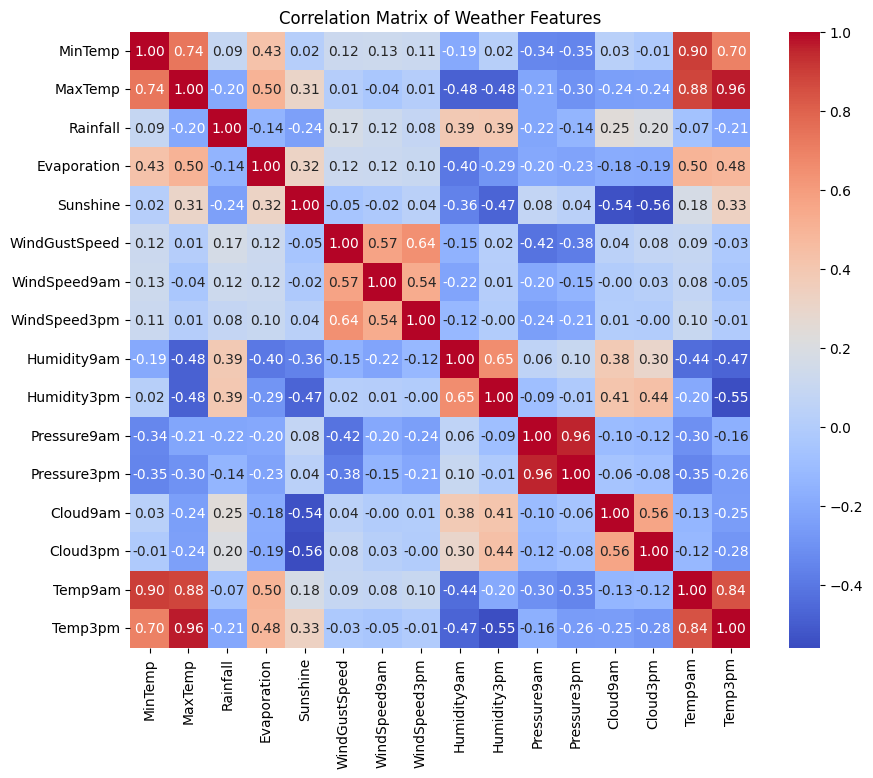

In [12]:
# create a correlation heat map for numerical columns 
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Weather Features")
plt.show()

As per the correlation plot and Based on its analysis, 
the creation of features like TempRange, PressureChange, AverageHumidity, and 
WindSpeedDiff seems justified, as they capture the variations and averages of these 
correlated measures throughout the day as per the dataset. 


In [13]:
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
df['PressureChange'] = df['Pressure9am'] - df['Pressure3pm']
df['AverageHumidity'] = (df['Humidity9am'] + df['Humidity3pm']) / 2
df['WindSpeedDiff'] = df['WindGustSpeed'] - ((df['WindSpeed9am'] + df['WindSpeed3pm']) / 2)

In [14]:
df.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,TempRange,PressureChange,AverageHumidity,WindSpeedDiff
0,MountGambier,15.2,24.3,0.0,4.4,6.8,SW,39.0,SSE,SW,...,20.9,No,Yes,2017,2,11,9.1,0.7,64.0,25.0


In [15]:
# Find categorical variables 
# List the names of the features which are categorical(string) which needs to be processed -either encoding or mapping.

categorical=[]
cols_types = zip(list(df.columns), list(df.dtypes))

for i in cols_types:
    if is_string_dtype(df[i[0]].dtype):
        categorical.append(i[0])

### ENCODING CATEGORICAL VARIABLES 

In [16]:
#lets check the unique values counts in the categorical variables 
for i in categorical[1:]: 
    print(i , df[i].nunique())

WindGustDir 16
WindDir9am 16
WindDir3pm 16
RainToday 2
RainTomorrow 2


## Remove 'Date' from categorical columns if present.

In [17]:
# Remove the 'Date' columns from the dataset
# your code here
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,TempRange,PressureChange,AverageHumidity,WindSpeedDiff
0,MountGambier,15.2,24.3,0.0,4.4,6.8,SW,39.0,SSE,SW,...,20.9,No,Yes,2017,2,11,9.1,0.7,64.0,25.0
1,Brisbane,13.9,21.6,8.8,3.2,6.6,ESE,44.0,SW,ESE,...,20.0,Yes,Yes,2011,8,23,7.7,2.7,81.0,36.5
2,Newcastle,9.5,24.2,0.0,4.4,6.8,W,41.0,NW,SW,...,24.0,No,Yes,2014,9,11,14.7,2.3,44.5,37.0
3,CoffsHarbour,16.3,20.7,4.4,4.4,6.8,WSW,41.0,WSW,SE,...,20.0,Yes,Yes,2015,5,31,4.4,4.9,89.0,34.0
4,NorahHead,15.2,25.1,3.8,4.4,6.8,W,46.0,NNW,WNW,...,20.5,Yes,Yes,2015,4,7,9.9,0.6,68.5,36.5


In [18]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         40000 non-null  object 
 1   MinTemp          40000 non-null  float64
 2   MaxTemp          40000 non-null  float64
 3   Rainfall         40000 non-null  float64
 4   Evaporation      40000 non-null  float64
 5   Sunshine         40000 non-null  float64
 6   WindGustDir      40000 non-null  object 
 7   WindGustSpeed    40000 non-null  float64
 8   WindDir9am       40000 non-null  object 
 9   WindDir3pm       40000 non-null  object 
 10  WindSpeed9am     40000 non-null  float64
 11  WindSpeed3pm     40000 non-null  float64
 12  Humidity9am      40000 non-null  float64
 13  Humidity3pm      40000 non-null  float64
 14  Pressure9am      40000 non-null  float64
 15  Pressure3pm      40000 non-null  float64
 16  Cloud9am         40000 non-null  float64
 17  Cloud3pm    

In [20]:
df.Location.nunique()

49

In [21]:
#Encode the categorical variables except for RainTomorr
df_encoded = pd.get_dummies(data=df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], drop_first=False)

In [22]:
df_encoded

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,15.2,24.3,0.0,4.4,6.8,39.0,9.0,19.0,70.0,58.0,...,0,0,0,0,1,0,0,0,1,0
1,13.9,21.6,8.8,3.2,6.6,44.0,4.0,11.0,88.0,74.0,...,0,0,0,0,0,0,0,0,0,1
2,9.5,24.2,0.0,4.4,6.8,41.0,4.0,4.0,56.0,33.0,...,0,0,0,0,1,0,0,0,1,0
3,16.3,20.7,4.4,4.4,6.8,41.0,7.0,7.0,96.0,82.0,...,0,1,0,0,0,0,0,0,0,1
4,15.2,25.1,3.8,4.4,6.8,46.0,4.0,15.0,79.0,58.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,12.7,21.2,0.2,4.4,6.8,37.0,13.0,19.0,48.0,35.0,...,0,0,0,0,0,0,1,0,1,0
39996,19.1,28.6,0.0,5.4,7.7,50.0,22.0,35.0,73.0,65.0,...,0,0,0,0,0,0,0,0,1,0
39997,20.4,36.4,0.0,4.4,6.8,41.0,0.0,9.0,70.0,48.0,...,0,1,0,0,0,0,0,0,1,0
39998,1.8,18.1,0.0,4.4,6.8,33.0,2.0,19.0,70.0,59.0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
assert df_encoded.shape[1] == 123, "After encoding there will be 123 columns. "

In [24]:
df_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 123 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    MinTemp                    float64
 1    MaxTemp                    float64
 2    Rainfall                   float64
 3    Evaporation                float64
 4    Sunshine                   float64
 5    WindGustSpeed              float64
 6    WindSpeed9am               float64
 7    WindSpeed3pm               float64
 8    Humidity9am                float64
 9    Humidity3pm                float64
 10   Pressure9am                float64
 11   Pressure3pm                float64
 12   Cloud9am                   float64
 13   Cloud3pm                   float64
 14   Temp9am                    float64
 15   Temp3pm                    float64
 16   RainTomorrow               object 
 17   Year                       int64  
 18   Month                      int64  
 19   Day                    

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df_encoded["RainTomorrow"] = le.fit_transform(df_encoded["RainTomorrow"])

In [27]:
df_encoded["RainTomorrow"]

0        1
1        1
2        1
3        1
4        1
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: RainTomorrow, Length: 40000, dtype: int32

### Feature Scaling 

In the next step, we will scale the numerical columns

In [28]:
#Scaling the Numerical variables 
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

In [29]:
df_scaled_array = mm.fit_transform(df[numerical])

In [30]:
df_scaled_array

array([[0.55581948, 0.55009452, 0.        , ..., 0.88888889, 0.54978355,
        0.51067961],
       [0.52494062, 0.49905482, 1.        , ..., 0.55555556, 0.52380952,
        0.49320388],
       [0.42042755, 0.54820416, 0.        , ..., 0.        , 0.52380952,
        0.57087379],
       ...,
       [0.67933492, 0.77882798, 0.        , ..., 0.44444444, 0.74025974,
        0.78446602],
       [0.23752969, 0.43289225, 0.        , ..., 0.11111111, 0.36363636,
        0.43300971],
       [0.58194774, 0.75236295, 0.        , ..., 0.33333333, 0.67965368,
        0.76504854]])

In [31]:
df_scaled_array.shape

(40000, 16)

In [32]:
# Storing the scaled datapoints in the dataframe nsame df_Scaled
df_scaled = pd.DataFrame(df_scaled_array, columns=[numerical])

Create a combined dataframe with all the encoded , scaled and target column 

In [33]:
final_df= pd.concat([df_scaled,df_encoded] , axis =1 )

In [34]:
# Modify only the tuple column names
new_column_names = [('_'.join(col) if isinstance(col, tuple) else col) for col in final_df.columns]
final_df.columns = new_column_names

In [35]:
# Finally dropping all the null values from our dataset
final_df.dropna(axis=0, inplace=True)

In [36]:
final_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.555819,0.550095,0.000000,0.550,0.475524,0.250000,0.152542,0.333333,0.693878,0.58,...,0,0,0,0,1,0,0,0,1,0
1,0.524941,0.499055,1.000000,0.400,0.461538,0.289062,0.067797,0.192982,0.877551,0.74,...,0,0,0,0,0,0,0,0,0,1
2,0.420428,0.548204,0.000000,0.550,0.475524,0.265625,0.067797,0.070175,0.551020,0.33,...,0,0,0,0,1,0,0,0,1,0
3,0.581948,0.482042,0.500000,0.550,0.475524,0.265625,0.118644,0.122807,0.959184,0.82,...,0,1,0,0,0,0,0,0,0,1
4,0.555819,0.565217,0.431818,0.550,0.475524,0.304688,0.067797,0.263158,0.785714,0.58,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.496437,0.491493,0.022727,0.550,0.475524,0.234375,0.220339,0.333333,0.469388,0.35,...,0,0,0,0,0,0,1,0,1,0
39996,0.648456,0.631380,0.000000,0.675,0.538462,0.335938,0.372881,0.614035,0.724490,0.65,...,0,0,0,0,0,0,0,0,1,0
39997,0.679335,0.778828,0.000000,0.550,0.475524,0.265625,0.000000,0.157895,0.693878,0.48,...,0,1,0,0,0,0,0,0,1,0
39998,0.237530,0.432892,0.000000,0.550,0.475524,0.203125,0.033898,0.333333,0.693878,0.59,...,0,0,0,0,0,0,0,0,1,0


After the null value treatement, we will build the model on the rest of the data

In [37]:
X = final_df.drop(["RainTomorrow"], axis=1)
y = final_df["RainTomorrow"]

In [38]:
#splitting of df to training and testing with 0.25 as Test size 
# your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((30000, 138), (10000, 138), (30000,), (10000,))

In [40]:
# Train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0, C=10)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear')

## Prediction

In [41]:
#prediction on training
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 1, 1])

In [42]:
#prediction on testing 
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 1, ..., 1, 1, 1])

## Evaluation

In [43]:
# Training Accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.7927


In [44]:
# Testing Accuracy
from sklearn.metrics import accuracy_score, f1_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7828


## Feature Selection
### We can Try and reduce the number of variables and see how the model performs. 

In the case of Logistic regression, we can find out the coefficients of the variables from the equation and 
then use selected top variables with higher values of coefficients and train the model on it. If the model retains the accuracy and performance, we can use those variables only, so that not much time and memory has been used.
Also this method is not genralised since selecting independent factors depends on various other things like its relation with target variable, noise in the variable. etc. 

In [45]:
# Get the coefficients of the model
coefficients = logreg.coef_[0]

# Mapping feature names with their coefficients
coefficients_dict = dict(zip(final_df.columns, coefficients))

# Sorting and displaying the feature importance

coefficients_dict_logr = sorted(coefficients_dict.items(), key=lambda x: x[1], reverse=True)
coefficients_dict_logr

[('WindSpeedDiff', 0.7001460840241324),
 ('Location_Penrith', 0.6739058233836696),
 ('Location_Bendigo', 0.6702800606655229),
 ('Location_Perth', 0.5912232275361898),
 ('Location_Watsonia', 0.531144964117055),
 ('Location_Nuriootpa', 0.44443790467043504),
 ('WindDir3pm_NNE', 0.41815015393695565),
 ('WindDir3pm_NNW', 0.3990885353269873),
 ('Location_Albany', 0.3963994697607993),
 ('WindDir9am_NE', 0.3844488017497208),
 ('WindDir3pm_ESE', 0.31387685393410725),
 ('Location_Williamtown', 0.29917433845255287),
 ('Location_Uluru', 0.2906290386982325),
 ('Location_Sale', 0.28934091713150356),
 ('Location_PearceRAAF', 0.260130799957399),
 ('WindDir9am_E', 0.24497347279336484),
 ('Location_Launceston', 0.22986307909127363),
 ('Location_Moree', 0.21591977985811803),
 ('Location_Canberra', 0.18203927545162668),
 ('Location_Townsville', 0.17072663195573318),
 ('Location_Ballarat', 0.1607546240309112),
 ('Location_PerthAirport', 0.1502736234433819),
 ('Location_SalmonGums', 0.1430155250692302),
 ('

In [46]:
#Lets pick the top 10 features with greater coeffecient values.

coefficients_dict_logr = sorted(coefficients_dict.items(), key=lambda x: x[1], reverse=True)

top_10_feature_names = [feature[0] for feature in coefficients_dict_logr[ :10]]

# Displaying the top 3 feature names
top_10_feature_names

['WindSpeedDiff',
 'Location_Penrith',
 'Location_Bendigo',
 'Location_Perth',
 'Location_Watsonia',
 'Location_Nuriootpa',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 'Location_Albany',
 'WindDir9am_NE']

In [47]:
top_10_feature_names.append("RainTomorrow")

In [48]:
final_df[top_10_feature_names].head()

,WindSpeedDiff,Location_Penrith,Location_Bendigo,Location_Perth,Location_Watsonia,Location_Nuriootpa,WindDir3pm_NNE,WindDir3pm_NNW,Location_Albany,WindDir9am_NE,RainTomorrow
0,25.0,0,0,0,0,0,0,0,0,0,1
1,36.5,0,0,0,0,0,0,0,0,0,1
2,37.0,0,0,0,0,0,0,0,0,0,1
3,34.0,0,0,0,0,0,0,0,0,0,1
4,36.5,0,0,0,0,0,0,0,0,0,1


In [49]:
df_new = final_df[top_10_feature_names]

In [50]:
df_new.isna().sum()

WindSpeedDiff         0
Location_Penrith      0
Location_Bendigo      0
Location_Perth        0
Location_Watsonia     0
Location_Nuriootpa    0
WindDir3pm_NNE        0
WindDir3pm_NNW        0
Location_Albany       0
WindDir9am_NE         0
RainTomorrow          0
dtype: int64

## Evaluation

In [51]:
# Testing the performance of the model on the final dataset with selected features
X_train, X_test, y_train, y_test= train_test_split(df_new.drop('RainTomorrow', axis = 1), df_new['RainTomorrow'] , test_size=0.25,shuffle=True, random_state=42)


# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42, C=5)

# fit the model
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_test11 = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7828


# Hyper Parameter Tuning

Lets See what are best best paramters for training the data on logistic regression. This Process of tuning can take a lot of time, depending on number of fits and folds and data points and memory and GPU of your computer.

In [52]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           #cv = 5,
                           verbose=1)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=LogisticRegression(C=5, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100]}],
             scoring='accuracy', verbose=1)

In [53]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.6124


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=5, random_state=42, solver='liblinear')


Now with the values given by paramter tuning, we can set these parameters to fine tune and also use other paramter tuning method to see if there is any improvement

In [54]:
# Try your Code using optimised paramters here 

As per the model accuracy, the results are almost same, so we can drop the variables and use less number of features, this way training time is reduced, memory used is less. 
Note : This is an example where our accuracy didn't go down or up much so you must remember feature selection depends on various factors.
    
It's important to approach the interpretation of feature importance in logistic regression with caution. This includes being mindful of the scale at which the features are measured and acknowledging the possibility of multicollinearity between them. Additionally, one should not draw conclusions about causality from logistic regression models without conducting further validation studies.
    